# Notebook for the 5 ML models

Earlier works from `EDA.ipynb` was imported to here to continue the work in a separate notebook document.

Click [here](#ml) to jump to the <strong>ML section</strong>.


In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore", category=FutureWarning) #ignore warnings

In [2]:
df = pd.read_excel('forecasting_case_study.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   float64       
 4   In-Store Promo      1218 non-null   int64         
 5   Catalogue Promo     1218 non-null   int64         
 6   Store End Promo     1218 non-null   int64         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int64         
 9   V_DAY               1218 non-null   int64         
 10  EASTER              1218 non-null   int64         
 11  CHRISTMAS           1218 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 114.3+ KB


In [4]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [5]:
df.isnull().sum().sum()

0

There are no missing values in the data set.

# Data Understanding

In [6]:
unique_products = df["Product"].unique()
product_counts = df['Product'].value_counts()
print(f"There are {len(unique_products)} total unique products in the data set. \nThe product SKU numbers are listed below with the item count next to them:")
print(product_counts)

There are 6 total unique products in the data set. 
The product SKU numbers are listed below with the item count next to them:
SKU1    204
SKU2    204
SKU3    204
SKU4    204
SKU5    204
SKU6    198
Name: Product, dtype: int64


In [7]:
early = df["date"].min()
late = df["date"].max()
print(f"The earliest date in this data set is {early} and the latest date is {late}.")

The earliest date in this data set is 2017-02-05 00:00:00 and the latest date is 2020-12-27 00:00:00.


In [8]:
df.describe()

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,0.251043,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,0.215494,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,0.400000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,0.830000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


Make a function to generate colored heatmap with upper half covered:

In [9]:
def heatmap(df):
    labels = df.columns.values.tolist()
    rs = np.random.RandomState(0)
    pd.DataFrame(rs.rand(df.shape[1], df.shape[1]), index = labels, columns = labels)
    corr = df.corr()
    #show correlation heatmap plot with 2 digit precision
    corr.style.background_gradient(cmap='coolwarm').set_precision(2)

    #code to mask upper half of the correlational matrix
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    corr[mask] = np.nan
    
    return (corr
             .style
             .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
             .highlight_null(color='#f1f1f1')  # Color NaNs grey
             .set_precision(2))

In [10]:
heatmap(df)

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
Sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Price Discount (%),0.40,nan,nan,nan,nan,nan,nan,nan,nan,nan
In-Store Promo,0.24,0.22,nan,nan,nan,nan,nan,nan,nan,nan
Catalogue Promo,-0.12,-0.07,-0.49,nan,nan,nan,nan,nan,nan,nan
Store End Promo,0.24,0.22,0.37,0.12,nan,nan,nan,nan,nan,nan
Google_Mobility,0.06,-0.21,0.06,0.07,0.08,nan,nan,nan,nan,nan
Covid_Flag,-0.09,0.28,-0.02,-0.09,-0.08,-0.76,nan,nan,nan,nan
V_DAY,-0.01,-0.04,0.02,-0.04,0.02,0.08,0.01,nan,nan,nan
EASTER,-0.01,0.00,0.02,-0.04,-0.07,-0.11,0.01,-0.02,nan,nan
CHRISTMAS,-0.04,-0.01,0.01,0.05,-0.00,0.00,-0.00,-0.02,-0.02,nan


Identify data points outside of 3 standard deviations:

In [11]:
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()
potential_outliers = df.loc[(df['Sales'] > mean_sales + 3*std_sales) | (df['Sales'] < mean_sales - 3*std_sales)]
print(potential_outliers.count())
print(potential_outliers)

Product               26
date                  26
Sales                 26
Price Discount (%)    26
In-Store Promo        26
Catalogue Promo       26
Store End Promo       26
Google_Mobility       26
Covid_Flag            26
V_DAY                 26
EASTER                26
CHRISTMAS             26
dtype: int64
     Product       date   Sales  Price Discount (%)  In-Store Promo  \
46      SKU1 2017-12-24  155253                0.17               1   
98      SKU1 2018-12-23  174994                0.28               1   
150     SKU1 2019-12-22  258874                0.44               0   
421     SKU3 2017-05-07  212245                0.50               1   
426     SKU3 2017-06-11  248373                0.50               1   
437     SKU3 2017-08-27  236242                0.50               1   
447     SKU3 2017-11-05  212947                0.50               1   
478     SKU3 2018-06-10  288322                0.50               1   
494     SKU3 2018-09-30  237462                0

In [12]:
df.shape[0]

1218

Since there are only 26 data points out of 1218, this suggests that the data is relatively clean and does not have many extreme values.

We need to understand what exactly Google_Mobility is. To do this, we can plot the data points visually with `Google_Mobility` on y axis against `date`. First we sort the entire dataframe by date, then we plot the figure.

In [13]:
df = df.sort_values('date')

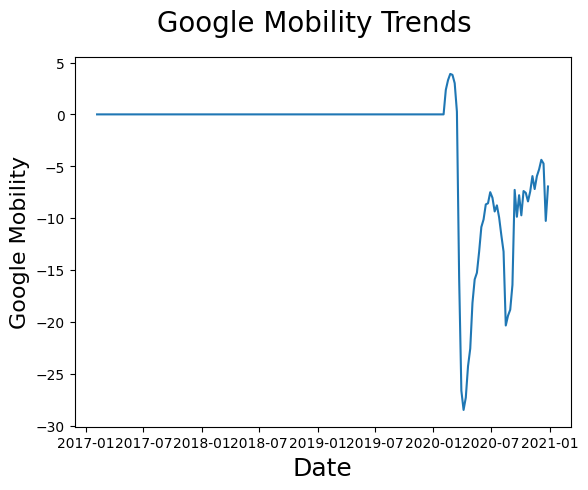

In [14]:
fig = plt.figure()
plt.plot(df['date'], df['Google_Mobility'])
fig.suptitle('Google Mobility Trends', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Google Mobility', fontsize=16)
fig.savefig('google_mobility_trends.jpg')

From the figure above, we conclude that there were a certain time period that `Google_Mobility` data was not collected before 2020. Therefore, the dataset has to be split into the following to compare predictions of the ML model:

-  Entire dataframe with `Google_Mobility` column dropped: `df_ignore_gm`
-  Entire dataframe with `Google_Mobility` being in the flatline before the first `Google_Mobility` non-zero value, `Google_Mobility` column dropped: `df_no_gm`
-  Entire dataframe with `Google_Mobility` values after the first `Google_Mobility` non-zero value, `Google_Mobility` column kept: `df_yes_gm`

# Data Transformation

In [15]:
first_non_zero_idx = (df['Google_Mobility'] != 0).idxmax()
print('Index of first non-zero value:', first_non_zero_idx)
first_nonzero_index = df[df['Google_Mobility'] != 0].index[0]
first_nonzero_date = df.loc[first_nonzero_index, 'date']
print('Date of first non-zero value:', first_nonzero_date)

Index of first non-zero value: 565
Date of first non-zero value: 2020-02-09 00:00:00


Here we separate `df` into the 3 groups discussed above:

In [16]:
df_ignore_gm = df.drop('Google_Mobility', axis=1)
df_no_gm = df.loc[:first_nonzero_index].drop(columns=['Google_Mobility'])
df_yes_gm = df.loc[first_nonzero_index:].copy()

In [17]:
dfs = {'df': df, 'df_ignore_gm': df_ignore_gm, 'df_no_gm': df_no_gm, 'df_yes_gm': df_yes_gm}
for name, df in dfs.items():
    print(f"The shape of {name} is: {df.shape}.")

The shape of df is: (1218, 12).
The shape of df_ignore_gm is: (1218, 11).
The shape of df_no_gm is: (943, 11).
The shape of df_yes_gm is: (276, 12).


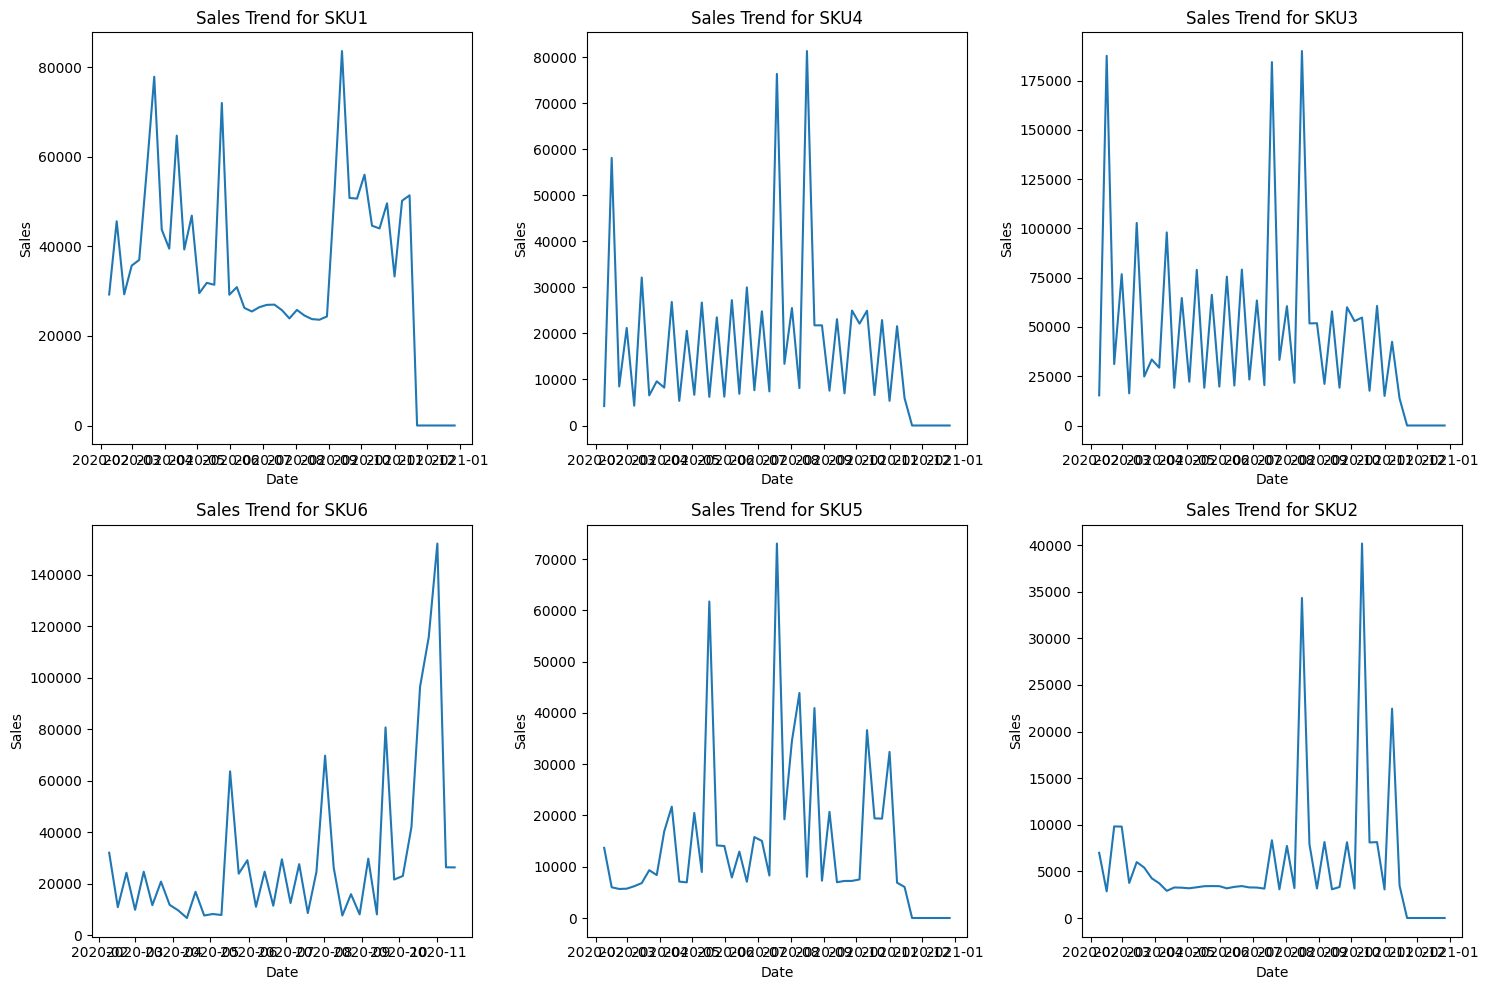

In [18]:
SKUs = df_ignore_gm['Product'].unique()  # get unique SKUs in the data
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, SKU in enumerate(SKUs):
    row = i // 3  
    col = i % 3     
    subset = df[df['Product'] == SKU]
    axes[row, col].plot(subset['date'], subset['Sales'])
    axes[row, col].set_title(f'Sales Trend for {SKU}')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Sales')
    #axes[row, col].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# Feature Engineering

The products can be transformed into numerical values with label encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Product Category'] = le.fit_transform(df['Product'])
for name, df in dfs.items():
    df['Product Category'] = le.fit_transform(df['Product'])
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  
0          0          0

Then another column for labelling as 1 if there are promos applied, and 0 if there are none which will be called `Promotions`.

In [20]:
promotional_cols = ['In-Store Promo', 'Catalogue Promo', 'Store End Promo', 'V_DAY', 'EASTER', 'CHRISTMAS']
for name, df in dfs.items():
    df['Promotions'] = (df[promotional_cols] == 1).any(axis=1).astype(int)
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  Promotions  
0          

Then a `Sales After Discount` column that considers actual sales after the discounts.

In [21]:
for name, df in dfs.items():
    df['Sales After Discount'] = df['Sales'] * (1 - df['Price Discount (%)'])
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 

A `Sales Mobility Ratio` column that takes each `Sales After Discount` value and divide by absolute value of `Google_Mobility` value (might need to figure out if the absolute value is necessary later)

In [22]:
df_yes_gm['Sales Mobility Ratio'] = df_yes_gm['Sales After Discount'] / abs(df_yes_gm['Google_Mobility'])
print(f"\n Check df_yes_gm's new transformed dataframe': \n")
print(df_yes_gm.head())


 Check df_yes_gm's new transformed dataframe': 

    Product       date  Sales  Price Discount (%)  In-Store Promo  \
565    SKU3 2020-02-09  15286                0.67               0   
361    SKU2 2020-02-09   6993                0.25               0   
157    SKU1 2020-02-09  29239                0.01               1   
973    SKU5 2020-02-09  13686                0.25               0   
769    SKU4 2020-02-09   4218                0.51               0   

     Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
565                1                1             2.36           1      0   
361                0                0             2.36           1      0   
157                0                1             2.36           1      0   
973                0                0             2.36           1      0   
769                1                1             2.36           1      0   

     EASTER  CHRISTMAS  Product Category  Promotions  Sales After Discou

A new `MA_3months` column that considers the moving average size of 90 days where the first two rows are dropped to get rid of NaN values:

In [23]:
for name, df in dfs.items():
    df['MA_3months'] = df['Sales After Discount'].rolling(window=90, min_periods=1).mean()
    df.dropna(inplace=True)
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 

From date we can categorize them even further into quarters and seasons. Here in the `Season` column, 0 is spring for Q1 & Q2 and 1 is fall for Q3 & Q4.

In [24]:
for name, df in dfs.items():
    df['Quarter'] = pd.to_datetime(df['date']).dt.quarter
    df['Season'] = df['Quarter'].map({1: 0, 2: 0, 3: 1, 4: 1})
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 

A column that has encoded season values from 0 to 1.

In [25]:
for name, df in dfs.items():
    df['Quarter_Encoded'] = le.fit_transform(df['Quarter'])
    df['Encoded_Season'] = (df['Quarter_Encoded'] / 4) + 0.25
    df.drop(columns=['Quarter_Encoded'], inplace=True)
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 

Some extra data cleaning work needs to be done to generate useful plots. In particular, the correlation plot for `df_yes_gm` is missing information on `Covid_Flag`.

In [26]:
for name, df in dfs.items():
    print(f"\n Check {name}'s correlation maps': \n")
    display(heatmap(df))


 Check df's correlation maps': 



,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Product Category,Promotions,Sales After Discount,MA_3months,Quarter,Season,Encoded_Season
Sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Price Discount (%),0.40,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
In-Store Promo,0.24,0.22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Catalogue Promo,-0.12,-0.07,-0.49,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Store End Promo,0.24,0.22,0.37,0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Google_Mobility,0.06,-0.21,0.06,0.07,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Covid_Flag,-0.09,0.28,-0.02,-0.09,-0.08,-0.76,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
V_DAY,-0.01,-0.04,0.02,-0.04,0.02,0.08,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EASTER,-0.01,0.00,0.02,-0.04,-0.07,-0.11,0.01,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan
CHRISTMAS,-0.04,-0.01,0.01,0.05,-0.00,0.00,-0.00,-0.02,-0.02,nan,nan,nan,nan,nan,nan,nan,nan



 Check df_ignore_gm's correlation maps': 



,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Product Category,Promotions,Sales After Discount,MA_3months,Quarter,Season,Encoded_Season
Sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Price Discount (%),0.40,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
In-Store Promo,0.24,0.22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Catalogue Promo,-0.12,-0.07,-0.49,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Store End Promo,0.24,0.22,0.37,0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Covid_Flag,-0.09,0.28,-0.02,-0.09,-0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
V_DAY,-0.01,-0.04,0.02,-0.04,0.02,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EASTER,-0.01,0.00,0.02,-0.04,-0.07,0.01,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan
CHRISTMAS,-0.04,-0.01,0.01,0.05,-0.00,-0.00,-0.02,-0.02,nan,nan,nan,nan,nan,nan,nan,nan
Product Category,-0.09,0.28,0.02,0.11,0.10,-0.01,0.00,0.00,-0.01,nan,nan,nan,nan,nan,nan,nan



 Check df_no_gm's correlation maps': 



,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Product Category,Promotions,Sales After Discount,MA_3months,Quarter,Season,Encoded_Season
Sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Price Discount (%),0.51,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
In-Store Promo,0.25,0.23,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Catalogue Promo,-0.14,-0.14,-0.53,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Store End Promo,0.24,0.23,0.33,0.13,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Covid_Flag,-0.01,0.08,-0.03,0.06,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
V_DAY,-0.04,-0.04,0.01,-0.04,0.01,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EASTER,-0.03,-0.02,0.02,-0.04,-0.06,-0.00,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan
CHRISTMAS,-0.02,-0.02,0.02,0.03,0.01,-0.00,-0.02,-0.02,nan,nan,nan,nan,nan,nan,nan,nan
Product Category,-0.09,0.28,0.02,0.11,0.10,-0.01,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan



 Check df_yes_gm's correlation maps': 



,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Product Category,Promotions,Sales After Discount,Sales Mobility Ratio,MA_3months,Quarter,Season,Encoded_Season
Sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Price Discount (%),0.33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
In-Store Promo,0.20,0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Catalogue Promo,-0.09,0.20,-0.37,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Store End Promo,0.18,0.32,0.48,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Google_Mobility,-0.02,-0.00,0.12,0.01,0.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Covid_Flag,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
V_DAY,0.14,-0.06,0.07,-0.06,0.07,0.26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EASTER,0.06,0.04,0.02,-0.06,-0.09,-0.31,nan,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CHRISTMAS,-0.12,0.02,-0.01,0.10,-0.02,0.00,nan,-0.02,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [27]:
df['Covid_Flag'].describe()

count    276.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Covid_Flag, dtype: float64

From the above we could explain that `Covid_Flag` is just a variable that determines if the dataset is in the period of Covid which is flagged as 1. As seen in `describe()`, there is no variation in the variable (where `std = 0.0`) which implies that all `Covid_Flag` values are 1. Therefore, it is safe to drop the variable from `df_yes_gm` to allow the correlation table look better.

In [28]:
df_yes_gm = df_yes_gm.drop('Covid_Flag', axis=1)
heatmap(df_yes_gm)

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,V_DAY,EASTER,CHRISTMAS,Product Category,Promotions,Sales After Discount,Sales Mobility Ratio,MA_3months,Quarter,Season,Encoded_Season
Sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Price Discount (%),0.33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
In-Store Promo,0.20,0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Catalogue Promo,-0.09,0.20,-0.37,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Store End Promo,0.18,0.32,0.48,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Google_Mobility,-0.02,-0.00,0.12,0.01,0.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
V_DAY,0.14,-0.06,0.07,-0.06,0.07,0.26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EASTER,0.06,0.04,0.02,-0.06,-0.09,-0.31,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CHRISTMAS,-0.12,0.02,-0.01,0.10,-0.02,0.00,-0.02,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan
Product Category,-0.05,0.35,0.02,0.12,0.08,-0.02,0.00,0.00,-0.04,nan,nan,nan,nan,nan,nan,nan,nan


<a id='ml'></a>
# Machine Learning Models

5 ML models were suggested to be used to perform the forecasting:
- ARIMA: Autoregressive Integrated Moving Average model that combines past values with errors to forecast future values.
- LSTM: Long Short-Term Memory model that uses a neural network to predict future values by considering long-term dependencies and relationships between time series data.
- XGBoost: Extreme Gradient Boosting model that builds a decision tree model in an iterative and additive way to make accurate predictions.
- Prophet: Time series forecasting model developed by Facebook that utilizes an additive model and incorporates seasonality, holidays, and trend components.
- SARIMAX: Seasonal Autoregressive Integrated Moving Average with Exogenous Variables model that incorporates additional variables to account for external factors affecting the time series.

<strong>Linear Regression</strong> model was selected as the base model for this predicting continuous numerical values problem.

In [41]:
from statsmodels.tsa.arima.model import ARIMA               #ARIMA
from torch import nn                                        #LSTM
from xgboost import XGBRegressor                            #XGBoost
from prophet import Prophet                                 #Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import statsmodels.api as sm                                #SARIMAX

from sklearn.linear_model import LinearRegression           #Base model with LR

from sklearn.model_selection import train_test_split        #for splitting dataset

import warnings
warnings.filterwarnings("ignore", message="An unsupported index was provided")
warnings.filterwarnings("ignore", message="No supported index is available")

Importing plotly failed. Interactive plots will not work.


Cleaning data again for linear regression:

In [42]:
df = df.drop(['Product'], axis=1)
df_no_gm = df_no_gm.drop(['Product', 'Year_Quarter'], axis=1)
df_yes_gm = df_yes_gm.drop(['Product', 'Year_Quarter'], axis=1)

#create dataframes that store original date format for Prophet
prophet_df = pd.DataFrame()
prophet_df_no_gm = pd.DataFrame()
prophet_df_yes_gm = pd.DataFrame()

prophet_df['date'] = pd.to_datetime(df['date'])
prophet_df['orig_date'] = df['date']
prophet_df['Sales'] = df['Sales']

prophet_df_no_gm['date'] = pd.to_datetime(df_no_gm['date'])
prophet_df_no_gm['orig_date'] = df_no_gm['date']
prophet_df_no_gm['Sales'] = df_no_gm['Sales']

prophet_df_yes_gm['date'] = pd.to_datetime(df_yes_gm['date'])
prophet_df_yes_gm['orig_date'] = df_yes_gm['date']
prophet_df_yes_gm['Sales'] = df_yes_gm['Sales']

#convert date column to integer format for other models
df['date'] = pd.to_datetime(df['date']).astype('int64') // 10**9
df_no_gm['date'] = pd.to_datetime(df_no_gm['date']).astype('int64') // 10**9
df_yes_gm['date'] = pd.to_datetime(df_yes_gm['date']).astype('int64') // 10**9

In [43]:
def linreg(df, name):
    X = df.drop(['Sales'], axis=1)
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    error = np.abs(y_test - y_pred)
    actual = y_test
    forecast_accuracy = 1 - (np.sum(error) / np.sum(actual))
    print(f'Forecast Accuracy for {name}:', forecast_accuracy)

def xgbooster(df, name):
    X = df.drop(['Sales'], axis=1)
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = XGBRegressor()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    error = np.abs(y_test - y_pred)
    actual = y_test
    forecast_accuracy = 1 - (np.sum(error) / np.sum(actual))
    print(f'Forecast Accuracy for {name}:', forecast_accuracy)
    
def sarimax(df, name):
    X = df.drop(['Sales'], axis=1)
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    mod = sm.tsa.SARIMAX(y_train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
    res = mod.fit()
    y_pred = res.forecast(len(y_test))

    error = np.abs(y_test - y_pred)
    actual = y_test
    forecast_accuracy = 1 - (np.sum(error) / np.sum(actual))
    print(f'Forecast Accuracy for {name}:', forecast_accuracy)

target_dict = {"df": df, "df_no_gm": df_no_gm, "df_yes_gm": df_yes_gm}

print("---Linear Regression Results---")
for name, df in target_dict.items():
    linreg(df, name)
print("\n")

print("---XGBRegressor Results---")
for name, df in target_dict.items():
    xgbooster(df, name)
print("\n")

print("---SARIMAX Results---")
for name, df in target_dict.items():
    sarimax(df, name)

---Linear Regression Results---
Forecast Accuracy for df: 0.6199357170892748
Forecast Accuracy for df_no_gm: 0.8096388290614214
Forecast Accuracy for df_yes_gm: 0.6199357170886861


---XGBRegressor Results---
Forecast Accuracy for df: 0.8711475121097667
Forecast Accuracy for df_no_gm: 0.9535644951990137
Forecast Accuracy for df_yes_gm: 0.8711475121097667


---SARIMAX Results---
Forecast Accuracy for df: 1.0
Forecast Accuracy for df_no_gm: 0.9283463754955719
Forecast Accuracy for df_yes_gm: 1.0


The SARIMAX model in our case produced perfect 1.0 forecast accuracy for some of the datasets, which is highly unusual. While it is possible to achieve perfect accuracy in forecasting models, it is generally unlikely and could be a result of overfitting or having a very small dataset with only a few distinct values. Therefore, it is important to carefully evaluate the results and consider whether they are reasonable given the context and complexity of the problem. In our case, the perfect 1.0 values could be an indication of a possible overfitting issue or the data being too simple for the forecasting models.

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

class LSTMPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMPredictor, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(1), self.hidden_size)
        c0 = torch.zeros(1, x.size(1), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[-1, :, :])
        return out

def lstm(df, name):
    X = df.drop(['Sales'], axis=1)
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train = torch.from_numpy(X_train.values).float()
    y_train = torch.from_numpy(y_train.values).float()
    X_test = torch.from_numpy(X_test.values).float()

    input_size = X_train.size(1)
    hidden_size = 100
    output_size = 1
    model = LSTMPredictor(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(1000):
        optimizer.zero_grad()
        output = model(X_train.unsqueeze(0))
        loss = criterion(output, y_train.unsqueeze(1))
        loss.backward()
        optimizer.step()

    y_pred = model(X_test.unsqueeze(0)).detach().numpy().flatten()
    error = np.abs(y_test - y_pred)
    actual = y_test
    forecast_accuracy = 1 - (np.sum(error) / np.sum(actual))
    print(f'Forecast Accuracy for {name}:', forecast_accuracy)

target_dict = {"df": df, "df_no_gm": df_no_gm, "df_yes_gm": df_yes_gm}
print("---LSTM Results---")
for name, df in target_dict.items():
    lstm(df, name)

---LSTM Results---
Forecast Accuracy for df: 0.0006304536478272116
Forecast Accuracy for df_no_gm: 0.0007198744442050709
Forecast Accuracy for df_yes_gm: 0.00046408643472606315


After numerous tries with different learning rates, epoch, and test_size, the forecast accuracy is still very small compared to the results of LinearRegression and XGBoost. Therefore, we can conclude that:

## LSTM might not be the right model for this dataset.
Moving forward, we have to reset the date format to be used for Prophet model.

In [59]:
df = pd.read_excel('forecasting_case_study.xlsx')
df['date'] = pd.to_datetime(df['date'])
prophet_df_no_gm = df.loc[:first_nonzero_index].drop(columns=['Google_Mobility'])
prophet_df_yes_gm = df.loc[first_nonzero_index:].copy()

In [60]:
df['date'].describe()

count                    1218
unique                    204
top       2017-02-05 00:00:00
freq                        6
first     2017-02-05 00:00:00
last      2020-12-27 00:00:00
Name: date, dtype: object

21:57:45 - cmdstanpy - INFO - Chain [1] start processing
21:57:45 - cmdstanpy - INFO - Chain [1] done processing


---Prophet Graphs Results---
df graph


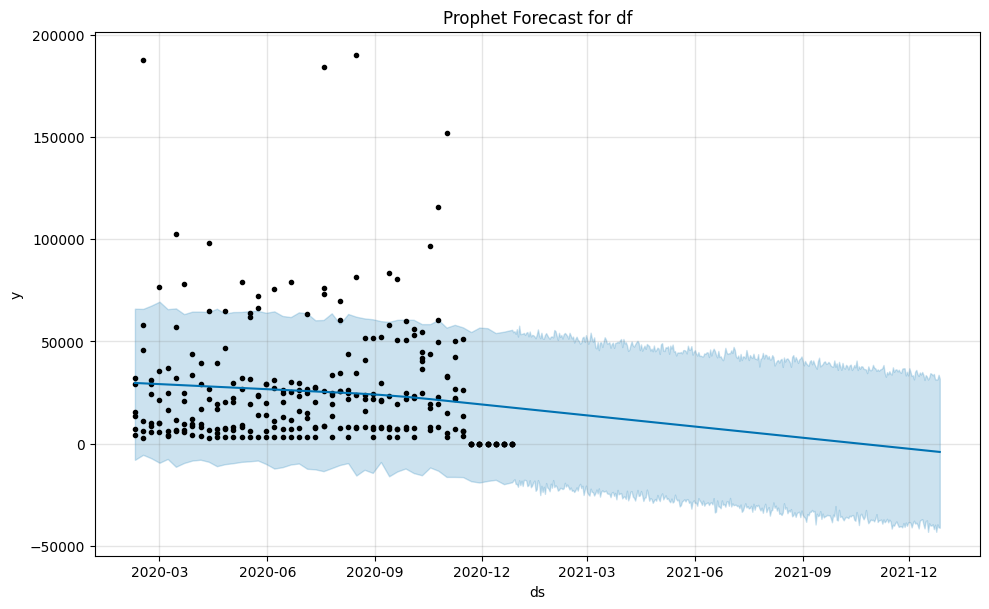

21:57:46 - cmdstanpy - INFO - Chain [1] start processing
21:57:46 - cmdstanpy - INFO - Chain [1] done processing


df_no_gm graph


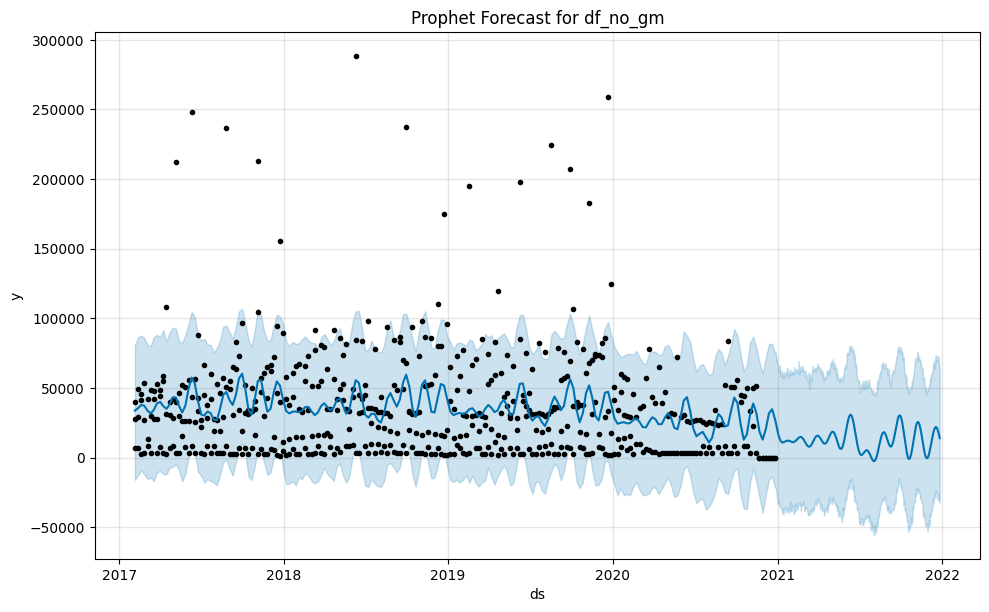

21:57:46 - cmdstanpy - INFO - Chain [1] start processing
21:57:46 - cmdstanpy - INFO - Chain [1] done processing


df_yes_gm graph


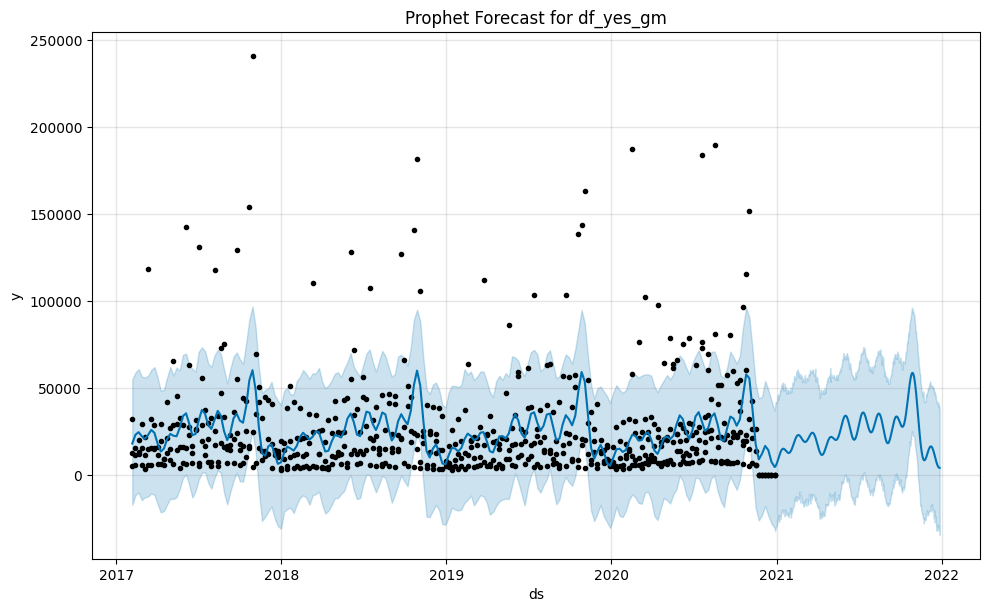

In [71]:
def prophetpred(df, name):
    df_prophet = df[['date', 'Sales']]
    df_prophet.columns = ['ds', 'y']
    df_prophet = df_prophet.sort_values('ds', ascending=True)
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    fig = model.plot(forecast)
    plt.title(f"Prophet Forecast for {name}")
    plt.show(fig)

target_dict_prophet = {"df": prophet_df, "df_no_gm": prophet_df_no_gm, "df_yes_gm": prophet_df_yes_gm}
print("---Prophet Graphs Results---")
for name, df in target_dict_prophet.items():
    print(f"{name} graph")
    prophetpred(df, name)

While both the linear regression and XGBRegressor models are commonly used in retail forecasting, neither takes into account seasonal patterns. On the other hand, SARIMAX is capable of modeling such patterns. However, for SARIMAX, it appears that the model may be overfitting to the data, which could lead to unreliable forecasts for future periods. Therefore, in this study, we found that the Prophet model is able to capture seasonal patterns in the dataset, as demonstrated in the figures.

Due to time constraints, we were unable to provide forecast accuracy metrics for the ARIMA and Prophet models.